# ScRNA-Seq from [Zheng68k](https://www.nature.com/articles/ncomms14049#Sec34)
### Github: https://github.com/10XGenomics/single-cell-3prime-paper/tree/master 

In [54]:
# Import packages
import scanpy as sc
import pandas as pd
import numpy as np
from functions import data_preprocessing as dp
from scipy.io import mmread

In [55]:
#path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Zheng68k/filtered_matrices_mex/hg19/matrix.mtx'
path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Zheng68k/example/matrix.mtx'

# Read the .mtx file
matrix = mmread(path).toarray()

# Convert the matrix to a NumPy array
matrix_array = np.array(matrix)

# Read labels
labels_path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Zheng68k/example/metadata.tsv'
labels = pd.read_csv(labels_path, sep='\t')[["barcodes","celltype"]]

# Read barcodes
barcodes_path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Zheng68k/example/barcodes.tsv'
barcodes = pd.read_csv(barcodes_path, sep='\t', header=None)
barcodes.columns = ["barcodes"]

merged_barcodes_labels = pd.merge(barcodes, labels, on='barcodes', how='left')

# Read genes
genes_path = '../../../../data/raw/data_for_evaluating_cell_type_annotation/Zheng68k/example/genes.tsv'
genes = pd.read_csv(genes_path, sep='\t', header=None)

In [56]:
np.shape(matrix_array)

(32738, 3639)

In [57]:
adata = sc.AnnData(X=matrix_array.T)
adata.index = genes.iloc[:,1].to_list()
adata.var_names = genes.iloc[:,1].to_list()
adata.var["gene_ENSG"] = genes.iloc[:,0].to_list()
adata.obs["barcodes"] = merged_barcodes_labels["barcodes"].to_list()
adata.obs["cell_type"] = merged_barcodes_labels["celltype"].to_list()

patient_ids = []
for barcode in adata.obs["barcodes"]:
    patient_ids.append(f"Patient_{str(barcode).split('-')[-1]}")
adata.obs["patientID"] = patient_ids

# Checking for duplicate genes
duplicate_genes = adata.var_names[adata.var_names.duplicated()]
if not duplicate_genes.empty:
    print(f"Duplicate genes found: {duplicate_genes}")
    print(f"Found {len(duplicate_genes)} genes")

    # Find the indexes of duplicate genes
    duplicate_gene_indexes = adata.var_names[adata.var_names.duplicated()]

    # Keep one index for each gene
    indexes_to_keep = []
    count_tracker = {}
    for idx, gene in enumerate(adata.var_names):
        if gene in duplicate_gene_indexes:
            try:
                if count_tracker[gene] == 1:
                    continue
            except:
                count_tracker[gene] = 1

        indexes_to_keep.append(idx)

    # Filter adata to remove duplicates, and only keep one of them
    adata = adata[:, indexes_to_keep]

Duplicate genes found: Index(['U1', 'EFNA3', 'DCAF8', 'MRPL30', 'LIMS3', 'KRBOX1', 'TLR9', 'RPP14',
       'CRYBG3', 'TM4SF19', 'UGT2A1', 'FAM47E-STBD1', 'CKS1B', 'CFB', 'TAP2',
       'SOGA3', 'AQP1', 'PSMA2', 'MRPS17', 'MUC3A', 'POLR2J2', 'IDS', 'SOX7',
       'DEFB130', 'OC90', 'ZFP41', '7SK', 'GALT', 'ANKRD18A', 'LCN6',
       'TMEM236', 'PI4K2A', 'GOLGA7B', 'NDUFB8', 'TIMM10B', 'PSMA1', 'KBTBD4',
       'ALG9', 'SDHD', 'MFRP', 'HOXC4', 'TMBIM4', 'SNORA40', 'LSP1', 'RNASE11',
       'TM9SF1', 'LTB4R2', 'KIAA0391', 'MDGA2', 'CCDC177', 'CRIP1', 'SNURF',
       'CELF6', 'ITFG3', 'NAA60', 'NPIPA7', 'NPIPA7', 'CLN3', 'PAGR1', 'SEPT1',
       'ZNF747', 'ZNF668', 'Y_RNA', 'CHTF8', '7SK', 'TUBB3', 'SHPK', 'CDRT1',
       'ZNF286A', 'Y_RNA', 'KRT222', 'ITGB3', 'ACE', 'SLC25A10', 'IER3IP1',
       'TMEM239', 'RBL1', 'UQCR11', 'NDUFA7', 'ZNF763', 'ZNF788', 'ZNF709',
       'PIK3R2', 'ZNF223', 'KLK9', 'SIGLEC5', 'ZNF8', '7SK', 'SLC5A3', 'FRG2C',
       'ZNF84', 'ZNF26', 'KIR3DL2', 'PNRC2', 'SR

## Preprocessing

In [48]:
# Add QC metrics to adata
adata = dp.QC().QC_metric_calc(adata)
print(adata.obs)

c:\Users\user\Documents\GitHub\Masters_Thesis\code\data_preprocessing\data_for_evaluating_cell_type_annotation\Zheng68k\functions\data_preprocessing.py:155: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs['n_counts'] = data.X.sum(1)


              barcodes        cell_type  patientID  n_counts  log_n_counts  \
0     AAACATACCACTCC-1          B cells  Patient_1      1036      6.944087   
1     AAACATACCGCTAA-1  CD14+ Monocytes  Patient_1      2883      7.966933   
2     AAACATACTAACGC-1      CD8 T cells  Patient_1       881      6.782192   
3     AAACATACTTATCC-1      CD4 T cells  Patient_1      1169      7.064759   
4     AAACATTGCATGGT-1   Megakaryocytes  Patient_1       536      6.285998   
...                ...              ...        ...       ...           ...   
3634  TTTCGAACTACTTC-1      CD4 T cells  Patient_1      1496      7.311218   
3635  TTTCGAACTCCTGC-1          B cells  Patient_1       518      6.251904   
3636  TTTCGAACTCTGGA-1      CD4 T cells  Patient_1      1073      6.979145   
3637  TTTCTACTCAGTCA-1  CD14+ Monocytes  Patient_1      1552      7.347944   
3638  TTTGCATGTCTTAC-1  CD14+ Monocytes  Patient_1      1193      7.085064   

      n_genes  log_n_genes  pct_counts_in_top_20_genes   mt_fra

In [49]:
#Filter genes:
print('Number of genes before filtering: {:d}'.format(adata.n_vars))

# Min "expression_limit" cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print(f'Number of genes after filtering so theres min {20} unique cells per gene: {adata.n_vars}')

Number of genes before filtering: 32643
Number of genes after filtering so theres min 20 unique cells per gene: 7683


## Normalize

In [50]:
norm_qc_adata = dp.log1p_normalize(adata)
del norm_qc_adata.layers['pp_counts']

In [51]:
norm_qc_adata

AnnData object with n_obs × n_vars = 3639 × 7683
    obs: 'barcodes', 'cell_type', 'patientID', 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'ribo_frac', 'hem_frac', 'size_factors'
    var: 'gene_ENSG', 'n_cells'
    layers: 'log1p_counts'

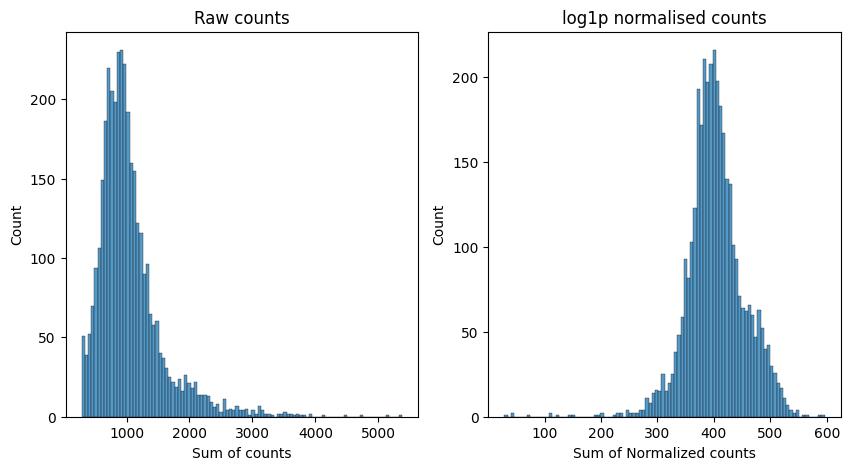

In [52]:
# Visualize counts before and after normalization
dp.EDA().VisualizeNormalization(norm_qc_adata)

In [53]:
# Change data type
norm_qc_adata.X = norm_qc_adata.X.astype(np.float32)

In [12]:
# Download normalized count matrix
norm_qc_adata.write('../../../../data/processed/data_for_evaluating_cell_type_annotation/Baron.h5ad')